In [ ]:


print("google collab python version?")
!python --version

print("basic imports")
import os
import numpy
import matplotlib
import astropy
import matplotlib
from random import *
from astropy.io import ascii
from google.colab import files
from astropy.table import Table
from astropy.modeling import models, fitting
from astropy.modeling.functional_models import Gaussian2D
import h5py
numpy.__version__, matplotlib.__version__, astropy.__version__, h5py.__version__

!pip uninstall specutils -y
!pip uninstall importlib-metadata -y
!pip install importlib_metadata >= 4.11.4


!pip install spectres
import spectres

!pip install specutils
import specutils

print("install fsps")
os.environ['SPS_HOME'] = "FSPS"
!git clone https://github.com/cconroy20/fsps.git $SPS_HOME
!pip install fsps
import fsps
fsps.__version__
sp = fsps.StellarPopulation(compute_vega_mags=False, zcontinuous=1, sfh=4, imf_type=2, dust_type=2, add_neb_emission=True, add_igm_absorption=True)
print("sucess!")

print("clone the CASTOR grism tool")
!git clone https://github.com/gnoir0t/ETC_grism.git
!pwd
!ls /content/ETC_grism

print("Edit the 'ETC_GRISM_HOME' variable in utils.py (needs to point to local 'ETC_grism_dev' folder)")
!sed -i 's!/Users/gael/Documents/PostDoc/Halifax/Work/CASTOR/forecastor/castor_etc/ETC_grism/ETC_grism_dev/!/content/ETC_grism/ETC_grism_dev/!' /content/ETC_grism/ETC_grism_dev/utils.py

print("Update setup.py to reflect google collab environment")
!sed -i 's!"MacOS"!"MacOS","Linux"!' /content/ETC_grism/setup.py

print("move to ETC_grism directory")
os.chdir("ETC_grism")

print("install the CASTOR grism tool")
!python setup.py install
import ETC_grism_dev

google collab python version?
Python 3.10.6
basic imports
Found existing installation: importlib-metadata 4.6.4
Uninstalling importlib-metadata-4.6.4:
  Successfully uninstalled importlib-metadata-4.6.4
ERROR: Could not find a version that satisfies the requirement 4.11.4 (from versions: none)
ERROR: No matching distribution found for 4.11.4
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.2/203.2 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.1/108.1 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.0/124.0 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.8/71.8 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.6/195.6 kB 12.4 MB/s eta 0:00:00
  Using cached importlib_metadata-6.8.0-py3-none-any.whl (22 kB)
  Installing build depende

ContextualVersionConflict: ignored

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

import ETC_grism_dev
from ETC_grism_dev import background
from ETC_grism_dev import spectrum
from ETC_grism_dev import disperser
from ETC_grism_dev import utils

In [ ]:
# Define constants
psf_fwhm = 0.15  ## [arcsec]
pixel_scale = 0.1  ## [arcsec]
psf_fwhm_pix = psf_fwhm/pixel_scale
x_stddev = psf_fwhm / (np.sqrt(8 * np.log(2)))
y_stddev = x_stddev
seg_thresholds = [1e-2, 1e-2, 1e-3]


In [ ]:
# field of view- pixels
fov = 400

#grid 400 x 400
x,y = np.meshgrid(np.arange(fov), np.arange(fov))

#point sources
source_list = []
x_point = [50.0, 90.0, 40.0]
y_point = [20.0, 12.0, 70.0]
for c, d in list(zip(x_point, y_point)):
    # Convert x and y to floating-point numbers and create a numpy array
    coordinates = np.array([float(c), float(d)])
    # Append the coordinates to the source_list
    source_list.append(coordinates)
source_list = [(50.0, 20.0), (90.0, 12.0), (40.0, 70.0)]


In [ ]:
mag_point = []
source_image = 0
count = 0
models = []

for coordinates in source_list:
  mag = random.uniform(21.0, 24.0)
  mag_point.append(mag)
  #x_mean = coordinates[0]
  x_mean = coordinates[:1]
  y_mean = coordinates[1:]
  model = Gaussian2D(amplitude = mag, x_mean = x_mean, y_mean = y_mean, x_stddev = x_stddev, y_stddev = y_stddev)
  models.append(model)
  source_image += model(x, y)

sources_individ = [model(x, y) for m in models]


In [ ]:
# source_seg is defined to be a Boolean array of the same size as source_image
#source_image = source_image #??
# Pixels where flux is greater than zero are defined as True in source_seg
source_seg = source_image > 0

<ipython-input-80-057c253c9f62>:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(source_image), origin = "lower")


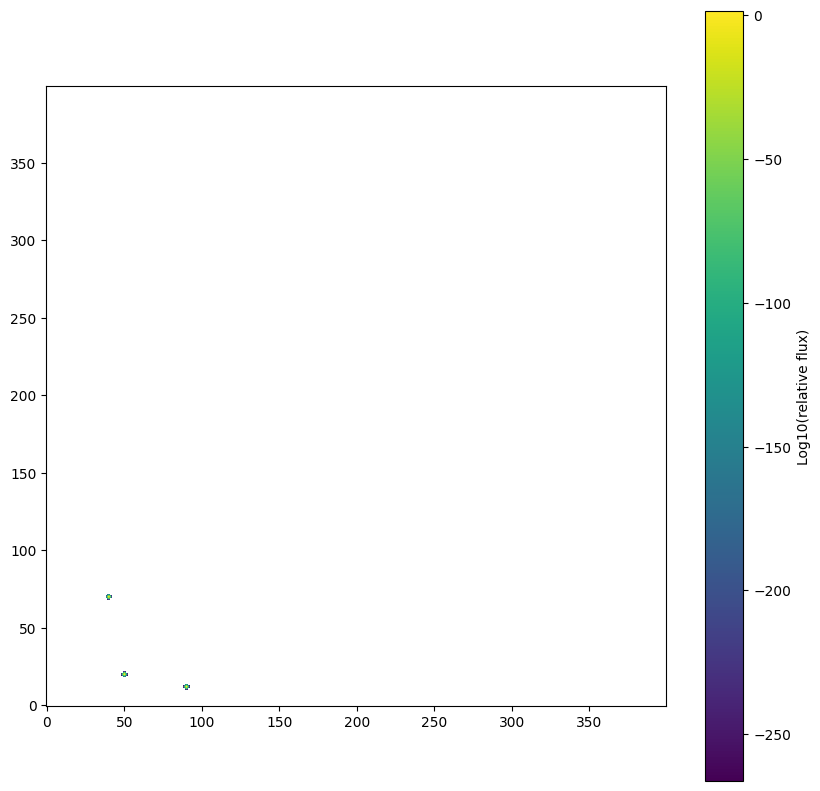

In [ ]:
# Plot source_image array as its natural logarithm
fig1 = plt.figure(figsize=(10,10))
plt.imshow(np.log10(source_image), origin = "lower")
plt.colorbar(label='Log10(relative flux)') #legend on the side
plt.show()


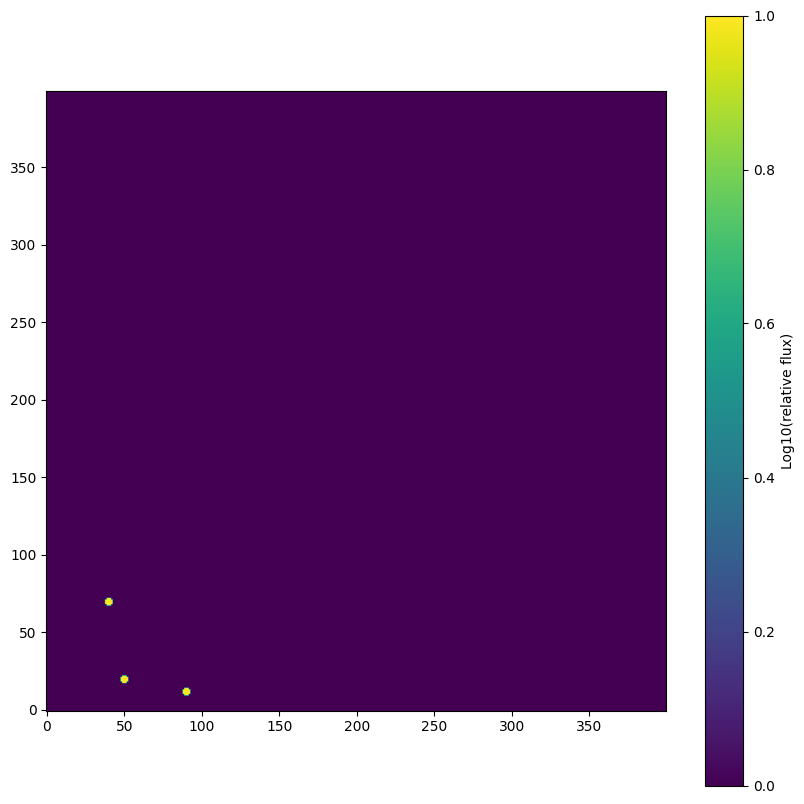

In [ ]:
# Plot boolean source_seg image
#source_seg shows all point sources with a flux above zero?
fig2 = plt.figure(figsize=(10,10))
plt.imshow(source_seg, origin = "lower")
plt.colorbar(label='Log10(relative flux)') #legend on the side
plt.show()

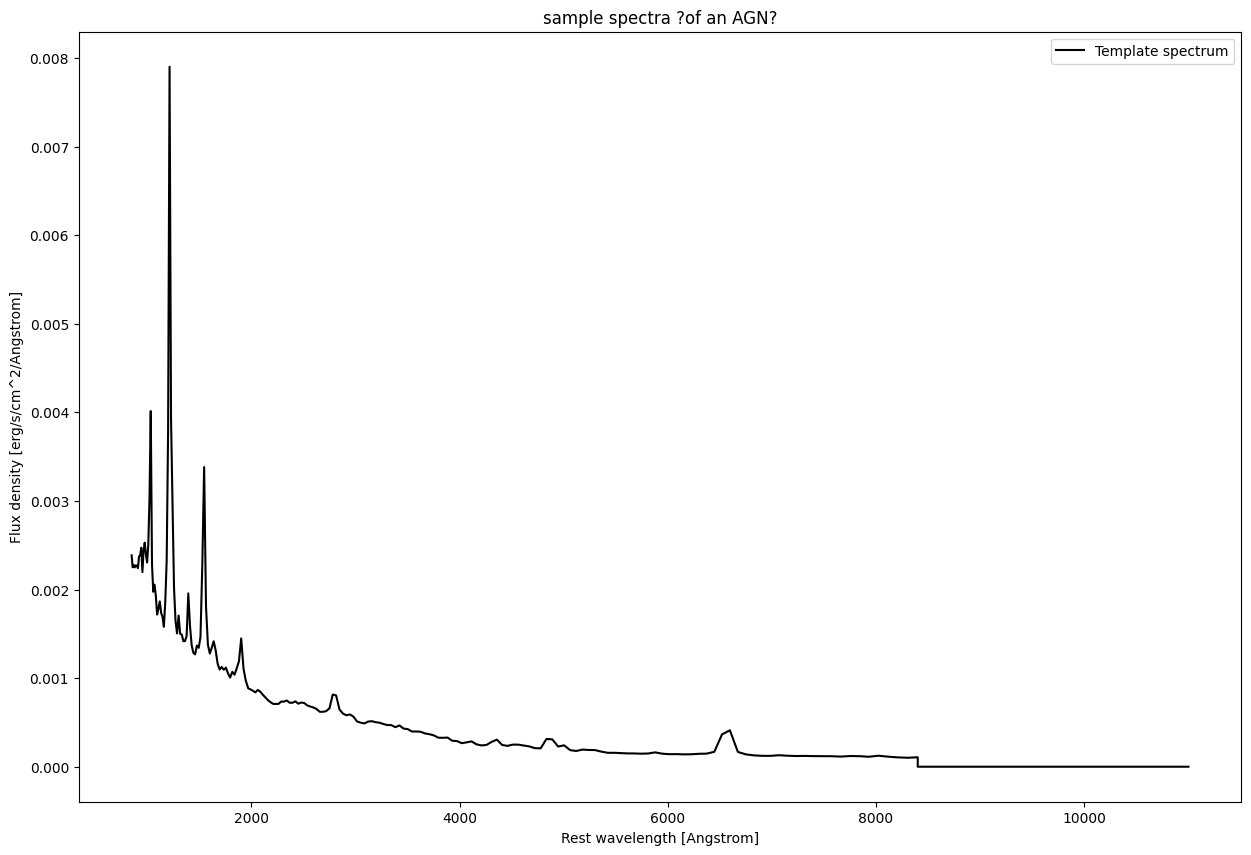

In [ ]:
template_spectrum_path = "/content/shang_etal_2011_figure6_flambdaunits.dat"


# Load template spectrum
# First column of the reference spectrum is the wavelength
# Second column is the flux
wave_file = np.loadtxt(template_spectrum_path, skiprows=1, usecols=0)  ## wavelength [Angstrom] or [A]
# wave_file = np.asarray(list(reversed(wave_file)))
flambda_file = np.loadtxt(template_spectrum_path, skiprows=1, usecols=1)  ## flux density [erg/s/cm^2/A]
# flambda_file = np.asarray(list(reversed(flambda_file)))

# If maximum wavelength is less than 11000 A, add wavelengths up to 11000 A and add flambda values of 0
if np.max(wave_file) < 11000.:
  wave_add = np.arange(np.max(wave_file), 11002., 2.)
  # wave = np.concatenate((wave_file, wave_add), axis=None)
  wave = np.asarray(list(wave_file) + list(wave_add))
  flambda_add = np.zeros((len(wave_add)))
  flambda = np.asarray(list(flambda_file) + list(flambda_add))
else:
  wave = wave_file
  flambda = flambda_file

# Plot spectrum
fig3 = plt.figure(figsize=(15,10))
plt.title("sample spectra ?of an AGN?")
plt.xlabel('Rest wavelength [Angstrom]')
plt.ylabel('Flux density [erg/s/cm^2/Angstrom]')
plt.plot(wave, flambda, color='k', ls='-', label='Template spectrum')
plt.legend(loc='best')
plt.show()


In [ ]:
#redshift
z_list = []
wave_template = []
flambda_template = []

for i in range(len(mag_point)):
  z = random.uniform(0.001, 2.300)
  z_list.append(z)
  wave_template.append(wave * (1. + z_list[i]))
  flambda_template.append(flambda)
print(z_list)
print(mag_point)


[0.1595940181703816, 1.6124788802166865, 1.723667542221594]
[22.68893862110337, 21.417891098547432, 21.283518282467682]


TARGET_FLAM, NON_NORM_FLAM, SCALING:  1.8743499307789124e-17 0.0009777369337329327 1.9170288715828425e-14
NORM_FLAM, NORM_FNU, NORM_MAG:  1.8743499307789124e-17 3.0508759652291597 22.688938621103368
TARGET_FLAM, TARGET_FNU, TARGET_MAG:  1.8743499307789124e-17 3.0508759652291597 22.68893862110337


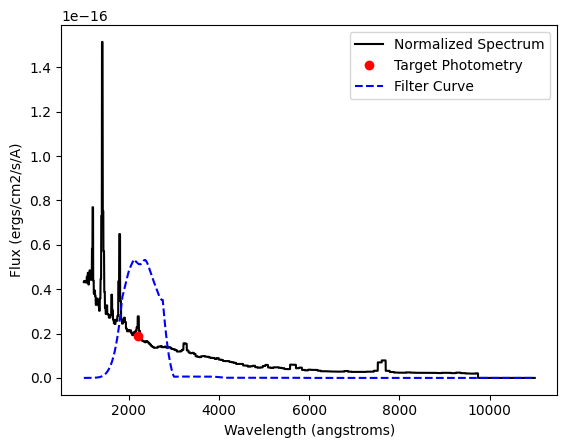

TARGET_FLAM, NON_NORM_FLAM, SCALING:  6.043237793782596e-17 0.0014861289508745306 4.066428953036935e-14
NORM_FLAM, NORM_FNU, NORM_MAG:  6.043237793782594e-17 9.83656713960236 21.417891098547436
TARGET_FLAM, TARGET_FNU, TARGET_MAG:  6.043237793782596e-17 9.836567139602362 21.417891098547432


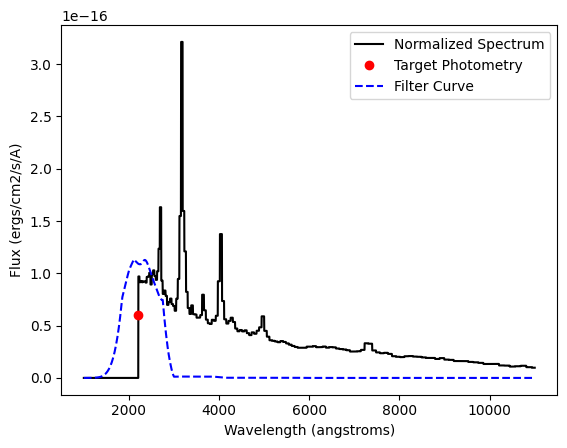

TARGET_FLAM, NON_NORM_FLAM, SCALING:  6.839412691796236e-17 0.0012787754416246258 5.348407913673315e-14
NORM_FLAM, NORM_FNU, NORM_MAG:  6.839412691796237e-17 11.13249956960447 21.28351828246769
TARGET_FLAM, TARGET_FNU, TARGET_MAG:  6.839412691796236e-17 11.132499569604468 21.283518282467682


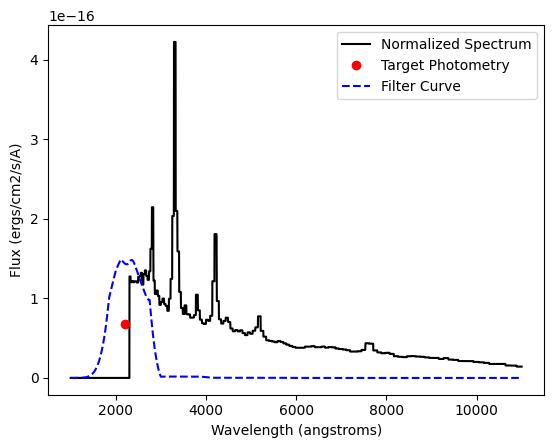

In [ ]:
filter_channel = "uv"
source_spectrum = []
#normalize each spectrum
for i in range (len(mag_point)):
  spectrum.spectrum = (wave_template[i], flambda_template[i])
  spectrum.normalize_spectrum(spectrum, magnitude= mag_point[i], filter_channel = filter_channel, check=True)
  source_spectrum.append(spectrum.spectrum)



In [ ]:
grism_channel = filter_channel
s_spectrum = spectrum.spectrum



```
Disperse function below !
```



In [ ]:

# This is formatted as code
# Disperse image
# The following code uses the disperse function from ETC_grism.
# The disperse function is adapted from ETC_grism such that it works for multiple point sources.
# The image is dispersed pixel by pixel, only pixels within the source_disperse_region are dispersed.


# WATCH!  User input required: Grism channel in which to disperse the spectrum
grism_channel = filter_channel

# Define source spectrum
source_spectrum = spectrum.spectrum


# Define disperse function
def disperse(self, source_image=None, source_disperse_region=None, source_spectrum=None, grism_channel=None, check=True):
    '''Grism disperser function

    INPUTS:
      source_image - 2D array of fluxes.  Relative of absolute.  Pixel scale needs to be CASTOR pixel scale
                     (no oversampling).

      source_disperse_region - Boolean 2D array, same size as source_image.  Pixels with False will be masked.
                               Pixels with True will be dispersed.

      source_spectrum - Source spectrum, in flux densities.  Source spectrum should be normalized (through spectrum.normalize_spectrum
                        or equivalent), and have same wavelength grid as filter_transmission.

      grism_channel - grism channel to use.  Options are: "uv" or "u".
    '''
    #if a variable is not defined a standard is used
    if source_image is None:
        source_image = np.copy(source.direct_image)
    else:
        source_image = np.copy(source_image)
    if source_disperse_region is None:
        source_disperse_region = np.copy(source.disperse_region)
    else:
        source_disperse_region = np.copy(source_disperse_region)
    if source_spectrum is None:
        source_spectrum = np.copy(spectrum.spectrum)
    else:
        source_spectrum = np.copy(source_spectrum)

    #get filter transmission dependent on filter channel
    #if grism_channel == 'uv':
      #filter_transmission = ascii.read('/content/etc_passband_uv.txt')
    #elif grism_channel == 'u':
      #filter_transmission = ascii.read('/content/etc_passband_u.txt')

    #get full grism throughtput dependent on filter channel
    if grism_channel == 'uv':
      grism_throughtput = ascii.read('/content/grism_efficiency_uv.txt')
    elif grism_channel == 'u':
      grism_throughtput = ascii.read('/content/grism_efficiency_u.txt')

    #get grism_dispersion dependent on filter channel
    if grism_channel == 'uv':
      grism_dispersion = ascii.read('/content/grism_dispersion_uv.txt')
    elif grism_channel == 'u':
      grism_dispersion = ascii.read('/content/grism_dispersion_u.txt')

    #get grism psf profile dependent on filter channel
    if grism_channel == 'uv':
      grism_psf_profile = ascii.read('/content/grism_approx_profile_uv.txt')
    elif grism_channel == 'u':
      grism_psf_profile = ascii.read('/content/grism_approx_profile_u.txt')

    #normalize image to get relative flux in each pixel
    #will be used to scale spectrum spatial array
    #norm is defined as the total of fluxes in the the source_image array
    #source_image_norm is the same size as source_image, divided by the norm
    norm = np.nansum(source_image[source_disperse_region])
    source_image_norm = source_image / norm

    #get pixels of sources that need to be dispered (i.e., pixels in non-masked region)
    #number of rows and columns are defined from source image dimensions
    nb_rows_img, nb_columns_img = source_image.shape
    #get pixels of source_image where boolean values equal True
    r_i, c_i = np.where(source_disperse_region)
    indices = [(r,c) for r,c in zip(r_i, c_i)]

    #create grism box that will be populated as we disperse the source spectrum onto it.
    #note that the grism box dimensions have been changed from the ETC_grism code
    #dimensions of the grism box have been increased such that all dispersed point sources can fit
    #the number of pixels to increase the grism box have been determined with the spectrum_spatial array
    #later grism_box will be cropped to have same dimensions as the source_image
    #spatial profile extent
    nb_rows_grism = nb_rows_img + 50
    #dispersion direction extent
    nb_columns_grism = nb_columns_img + 500
    #create box of zeros using above defined dimensions
    #later a spectrum_spatial_array comprised of spectral fluxes and psf profiles will be added to the grism box
    self.grism_box = np.zeros((nb_rows_grism, nb_columns_grism))

    #grism offsets with respect to direct imaging are defined and will be added to each indice
    y_offset = int((nb_rows_grism - nb_rows_img) / 2)  ## [pixels] - 25
    #arbitrary offset in dispersion direction
    x_offset = 10  ## [pixels]

        #NOW USING FULL GRISM THROUGHTPUT
        #    #Multiply spectrum with filter response curve and grism efficiency curve
        #    wave, flux = source_spectrum
        #    grid_ftrans = np.interp(wave, filter_transmission['col1']*1e4, filter_transmission['col2'])
        #    flux *= grid_ftrans
        #
        #    #Use dummy grism_efficiency for now (flat 25% transmission)
        #    grism_efficiency = 0.25
        #    flux *= grism_efficiency

    #obtain wave and flux from source spectrum
    wave, flux = np.copy(source_spectrum)
    #convert erg/s/cm^2/A to photons/s/cm^2/A
    flam_to_photonlam = 5.0341165675427094e7
    #multiply flam_to_photonlam, wave and flux to get photons
    spectrum_photon_density = flam_to_photonlam * wave * flux #in photons/cm2/s/A
    #take into account the grisms throughput to compute from photons to electrons
    #grism throughput has units of e-/photon
    #get wavelength and througtput from the grism_throughtput file
    wavelength_key = grism_throughtput.keys()[0]
    thput_key = grism_throughtput.keys()[1]
    #interpolate to get throughput values using the wavelengths from source spectrum
    grid_gthput = np.interp(wave, grism_throughtput[wavelength_key] * 10, 10**grism_throughtput[thput_key])
    #multiply spectrum (in photons/cm2/s/A) with full grism throughput to get e-/cm2/s/A
    spectrum_electron_density = spectrum_photon_density * grid_gthput   #"On detector" spectrum in e-/cm2/s/A
    #define the flux as the spectrum_electron_density
    flux = spectrum_electron_density

    # Resample spectrum to pixel dispersion using the grism dispersion text file
    # Pixel 1 corresponds to 3000 A for the "u" channel and 1500 A for the "uv" channel
    if grism_channel == 'uv':
        wave_zp = 1500
    if grism_channel == 'u':
        wave_zp = 3000
    # Grism dispersion text file contains how much dispersion in nanometers occurs in each pixel
    # for a length of 453 (303) pixels in the "uv" ("u") channel
    # Define wavelength_array as the sum of each pixel in grism dispersion text file starting with pixel 1 values defined above
    # wavelength_array has a length of 453 (303) in the "uv" ("u") channel
    wavelength_array = np.array([wave_zp + np.sum(grism_dispersion['col2'][:i] * 10) \
                                 for i in range(len(grism_dispersion['col2']))])
    # If spectrum doesn't fully overlap with wavelength_array, values of 0 are assumed
    # Resample the flux to the wavelength_array
    flux_resamp = spectres.spectres(wavelength_array, wave, flux, fill=0)

    if check:
        # Plot emitted spectrum and end to end grism throughput
        plt.figure(figsize=(15,10))
        plt.xlabel('Wavelength [Angstrom]')
        plt.ylabel('Flux density [erg/s/cm^2/Angstrom]')
        plt.plot(source_spectrum[0], source_spectrum[1], color='k', ls='-', label='Emitted spectrum')
        norm_y = 1.1 * max(source_spectrum[1][(source_spectrum[0] > plt.gca().get_xlim()[0]) & \
                                              (source_spectrum[0] < plt.gca().get_xlim()[1])])
        plt.plot(grism_throughtput[wavelength_key] * 10, 10**grism_throughtput[thput_key] * norm_y, color='grey', ls='-', label='End-to-end grism throughtput', zorder=-1)
        plt.legend()
        plt.xlim(min(wavelength_array) * 0.9, max(wavelength_array) * 1.1)
        plt.ylim(0, norm_y)

        # Plot 1D spectrum as seen "on detector"
        plt.figure(figsize=(15,10))
        plt.xlabel('Wavelength [Angstrom]')
        plt.ylabel('"On detector" electron flux [e-/s/cm^2/Angstrom]')
        plt.plot(wavelength_array, flux_resamp, color='r', ls='-', ds='steps-mid', label='"On Detector" spectrum')
        plt.xlim(min(wavelength_array) * 0.9, max(wavelength_array) * 1.1)
        plt.show()

    # Convert flux from electron flux densities (e-/s/cm2/A) to electron flux of e-/s/cm2 by multiplying it by the dispersion.
    # This is done here to be able to convert flux densities to counts (electrons) during the exposure.
    # If done at the exposure stage, then it complicates things as different wavelengths with different dispersions then overlap on the same pixels, which makes the conversion impracticle at this stage.
    flux_resamp *= grism_dispersion['col2'] * 10  ## [e-/s/cm^2]

    # Make PSF profile irradiance spectrum array.  Currently assumes no PSF variation across the different grisms.
    psf_profile_pix_oversampled = grism_psf_profile['col2']
    psf_profile_pix = np.arange(np.min(psf_profile_pix_oversampled), np.max(psf_profile_pix_oversampled)+1, 1)
    psf_profile_oversampled = grism_psf_profile['col4']
    psf_profile = np.interp(psf_profile_pix, psf_profile_pix_oversampled, psf_profile_oversampled)

    # Normalize to conserve total flux smeared due to psf profile
    norm = np.nansum(psf_profile)
    psf_profile_norm = psf_profile / norm
    #psf_profile_norm has a length of 17 in the "uv" channel
    #smear spectrum using psf_profile in spatial direction
    #spectrum_spatial is defined as an array of ones with the dimensions of 17 by 453 in the uv filter
    #spectrum_spatial is defined as an array of ones with the dimensions of x by 303 in the u filter
    #values in spectrum_spatial array is determined by multiplying the array by the flux obtained from the source spectrum and psf profile
    #since one spectrum is the same for all sources, the spectrum_spatial array will contain the same values for all sources
    #for each pixel with flux, the spectrum_spatial array will be multiplied by the pixel's relative flux
    #the spectrum_spatial array will then be added to the grism_box based on their source coordinates
    spectrum_spatial = np.ones((len(psf_profile_norm),len(wavelength_array))) * flux_resamp * psf_profile_norm[:, None]

    #loop over all pixels with a boolean value equal to "True" and disperse them (scale and add all 2D irradiance spectrum arrays).
    for indice in indices:
        #get spatial position (pixel indice) in the grism box of the source indice.
        y_indice = indice[0] + y_offset
        #get position of pixel1 in grism box
        x_indice = indice[1] + x_offset

        #scale 2D array according to relative flux of each pixel in direct imaging.
        scale = source_image_norm[indice]
        #multiply this scale to the spectrum_spatial array
        spectrum_spatial_scaled = spectrum_spatial * scale

        #add spectrum_spatial array to the grism box
        #determine where to add the spectrum_spatial array in the grism box
        y_len_spectrum_spatial = len(spectrum_spatial)
        y_start = int(y_indice - ((y_len_spectrum_spatial - 1) / 2))
        y_stop = y_start + y_len_spectrum_spatial
        x_len_spectrum_spatial = len(spectrum_spatial[0])
        x_stop = x_indice + x_len_spectrum_spatial

        #add spectrum_spatial array (signifying dispersed pixel with flux) to the grism box
        self.grism_box[y_start:y_stop, x_indice:x_stop] += spectrum_spatial_scaled

    # Calculate mirror area
    mirror_diameter = 100  ## [cm]
    mirror_area = np.pi * 0.25 * mirror_diameter**2  ## [cm^2]

    # Multiply by mirror area to get a count rate [e-/s]
    self.grism_box *= mirror_area

    # Change the grism box dimensions such that it has the same dimensions as the source image
    # self.grism_box = self.grism_box[:nb_rows_img,:nb_columns_img]

    # Plot grism box
    if check:
        plt.figure(figsize=(15,10))
        plt.xlabel('Pixels (dispersion direction)')
        plt.ylabel('Pixels (spatial direction)')
        plt.imshow(self.grism_box, aspect='auto', interpolation='none')
        plt.colorbar(label='"On detector" count rate [e-/s]')
        plt.show()

    return 0



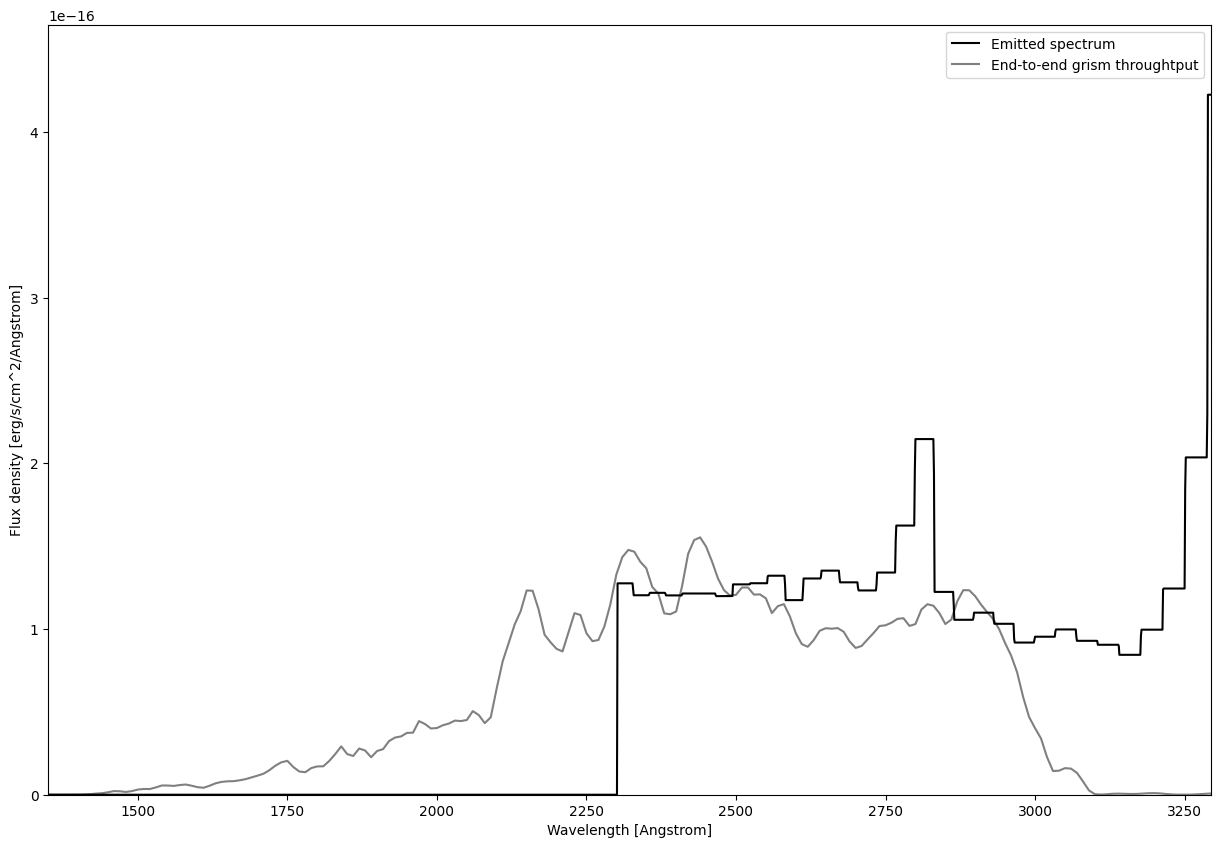

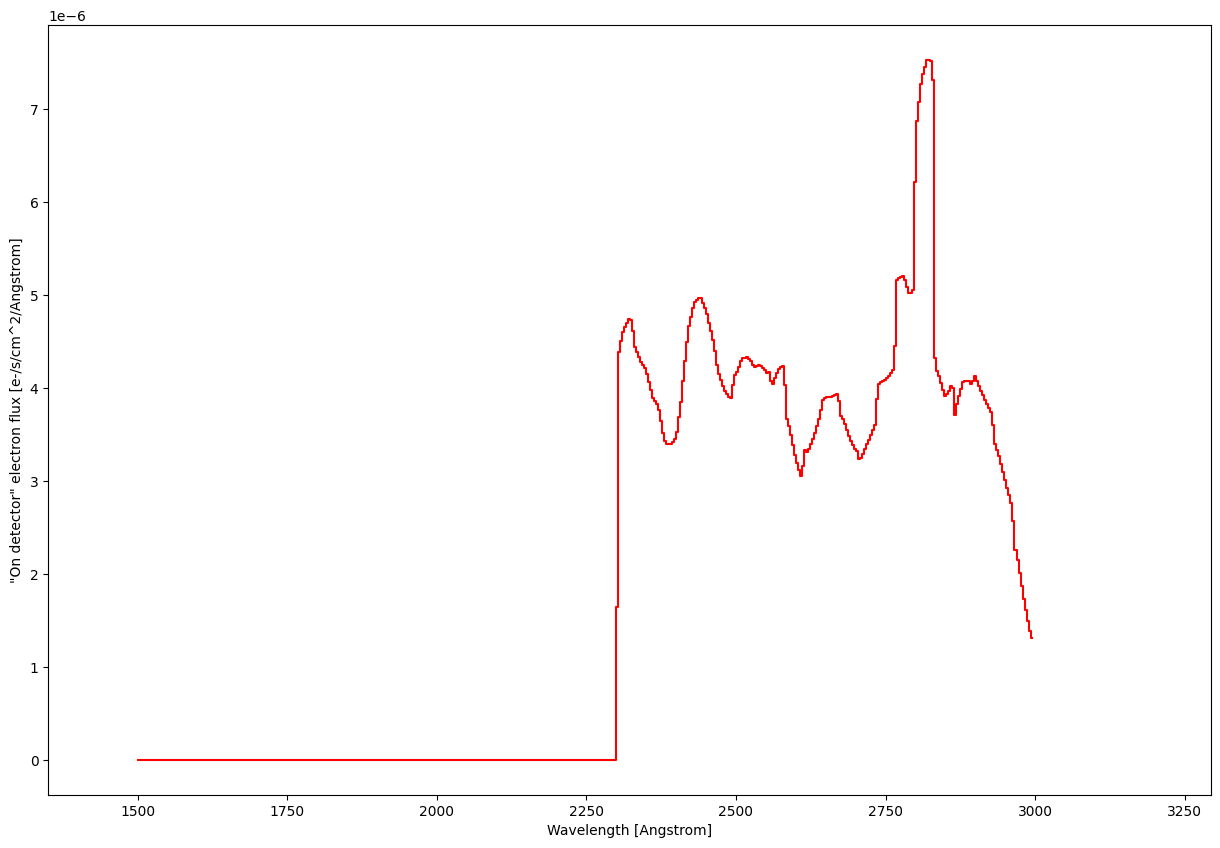

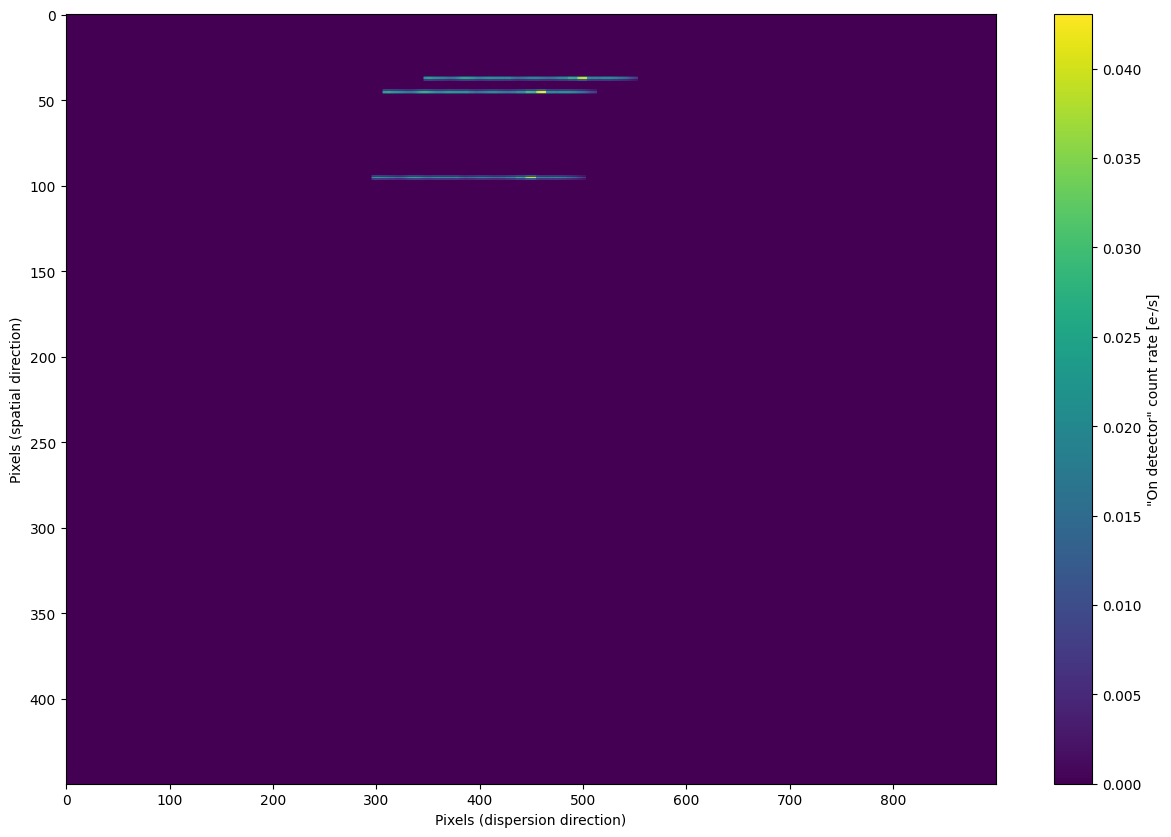

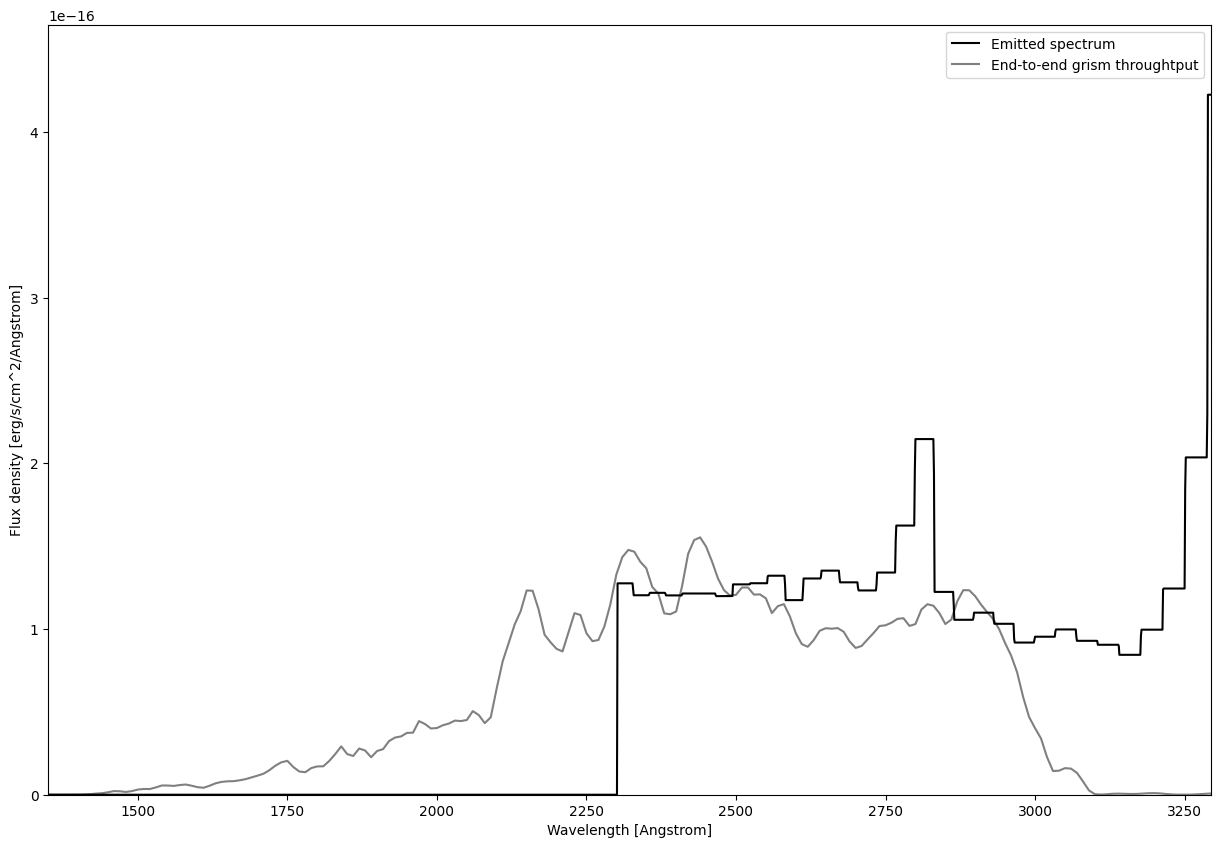

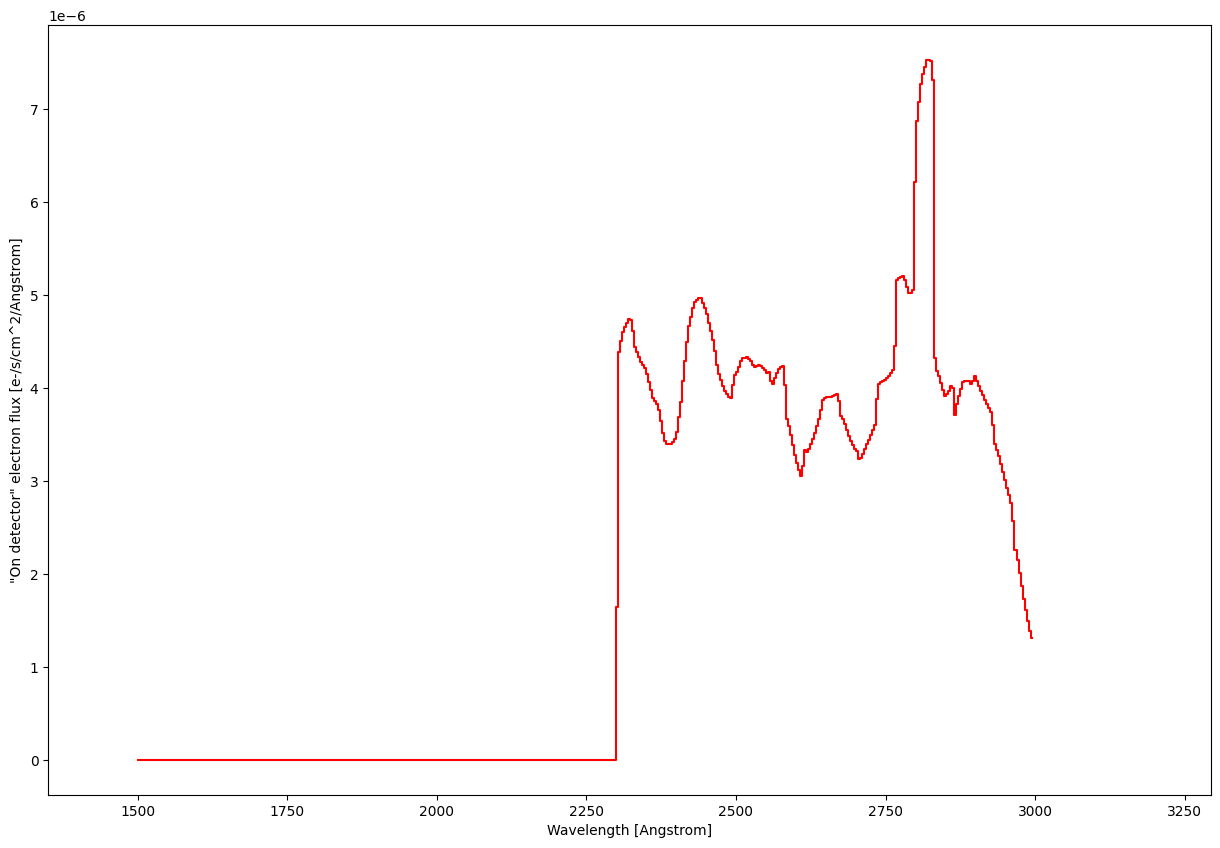

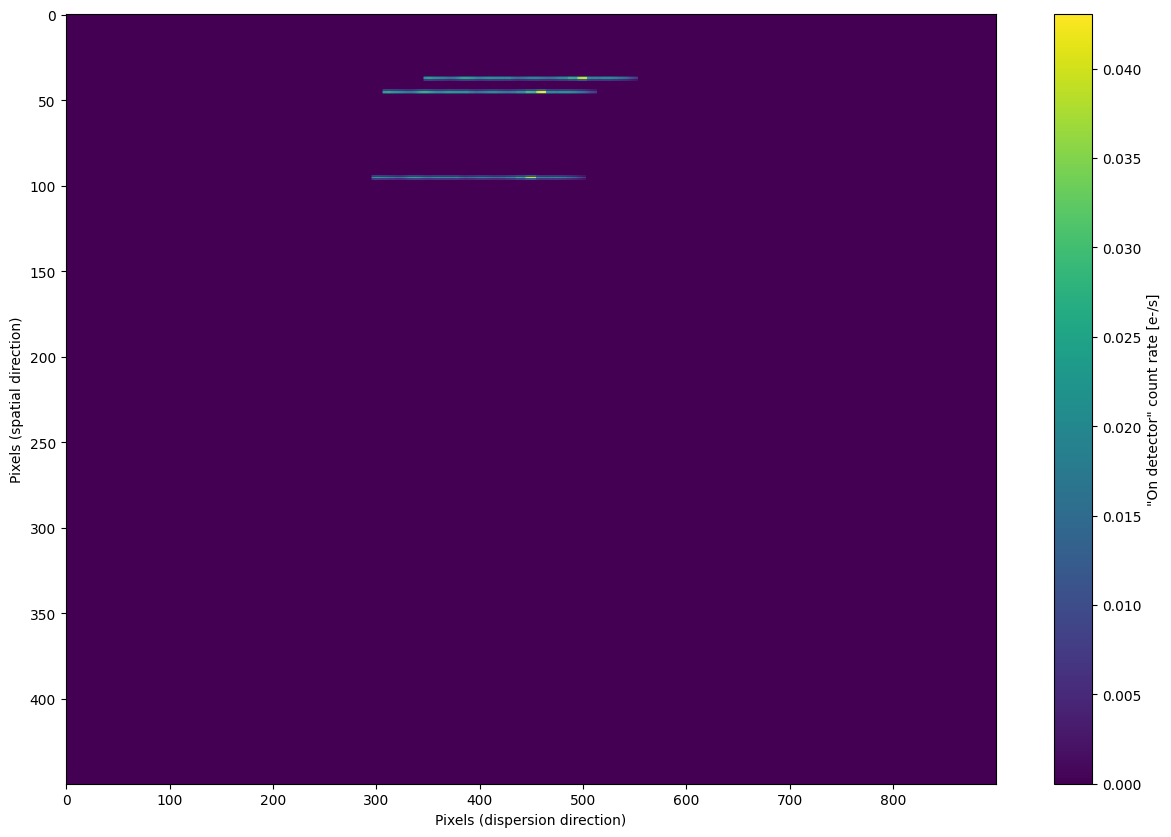

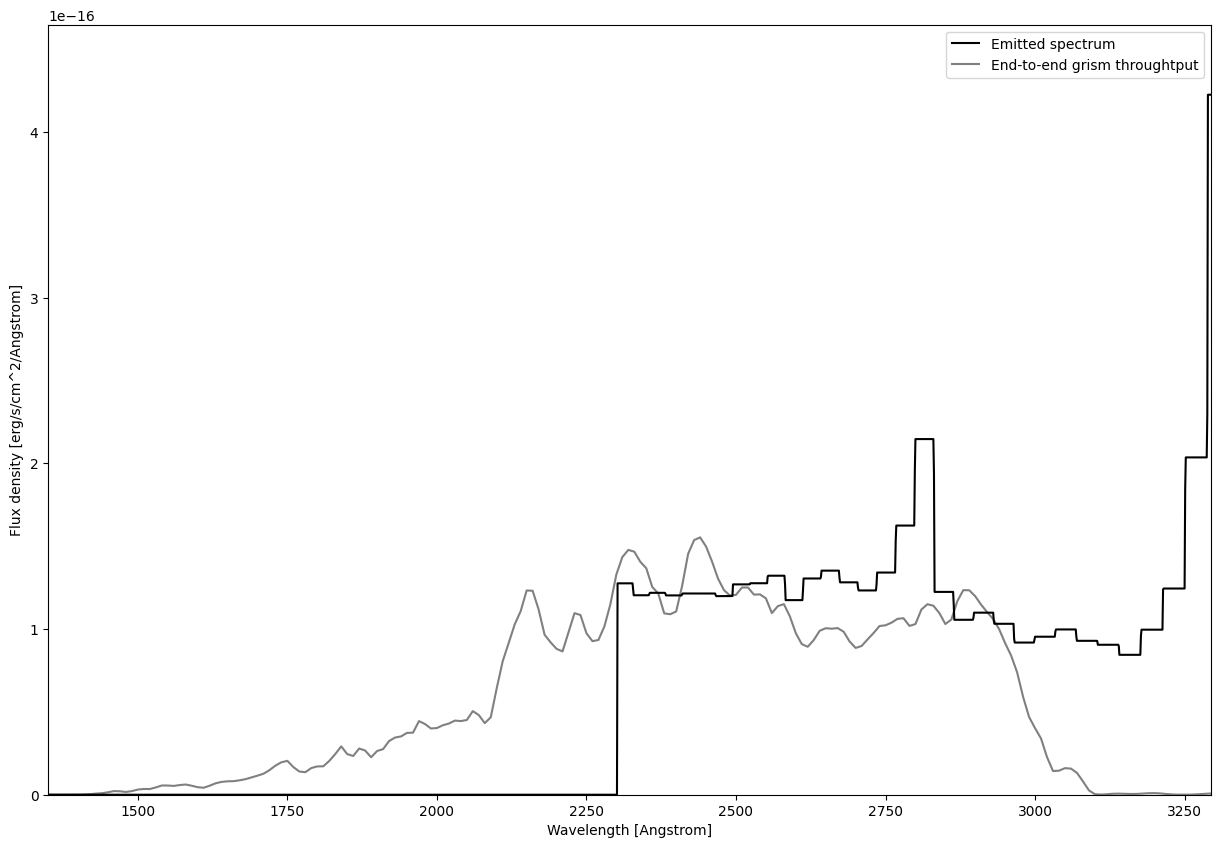

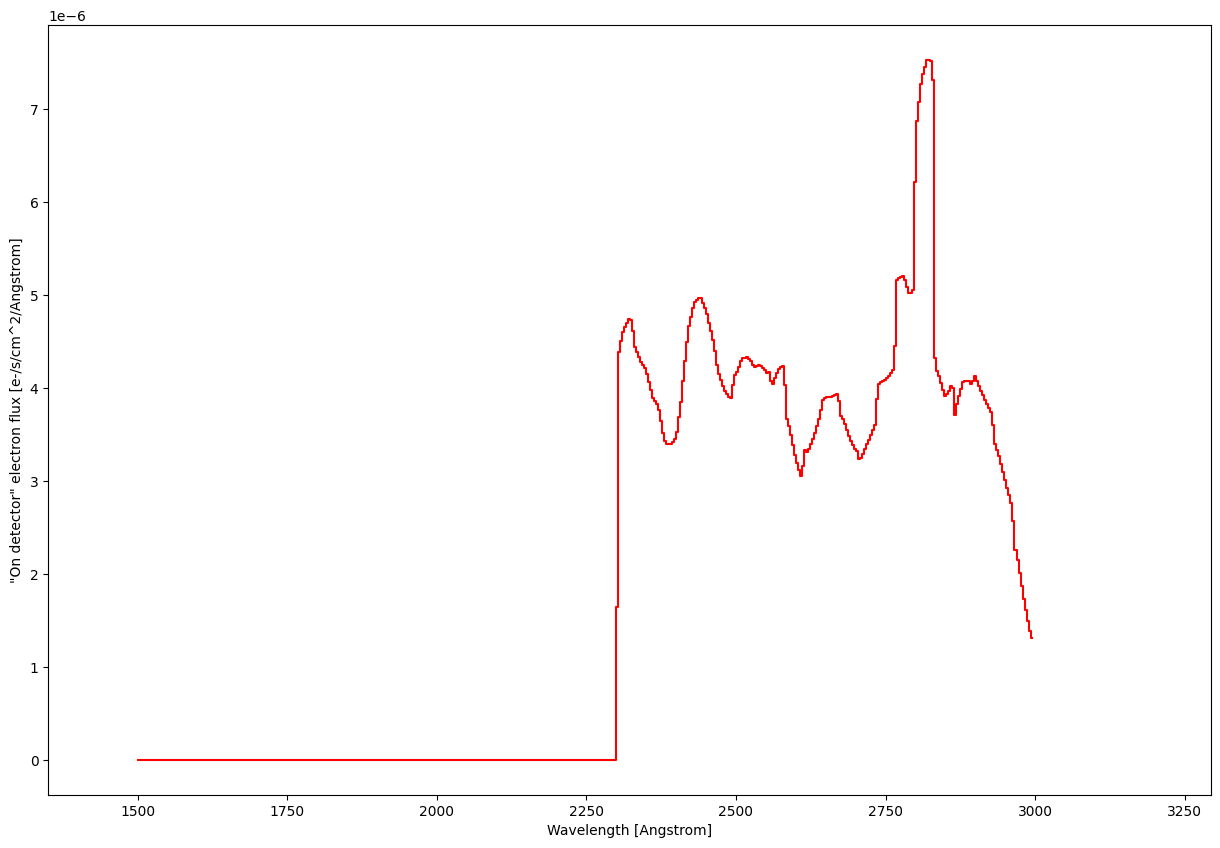

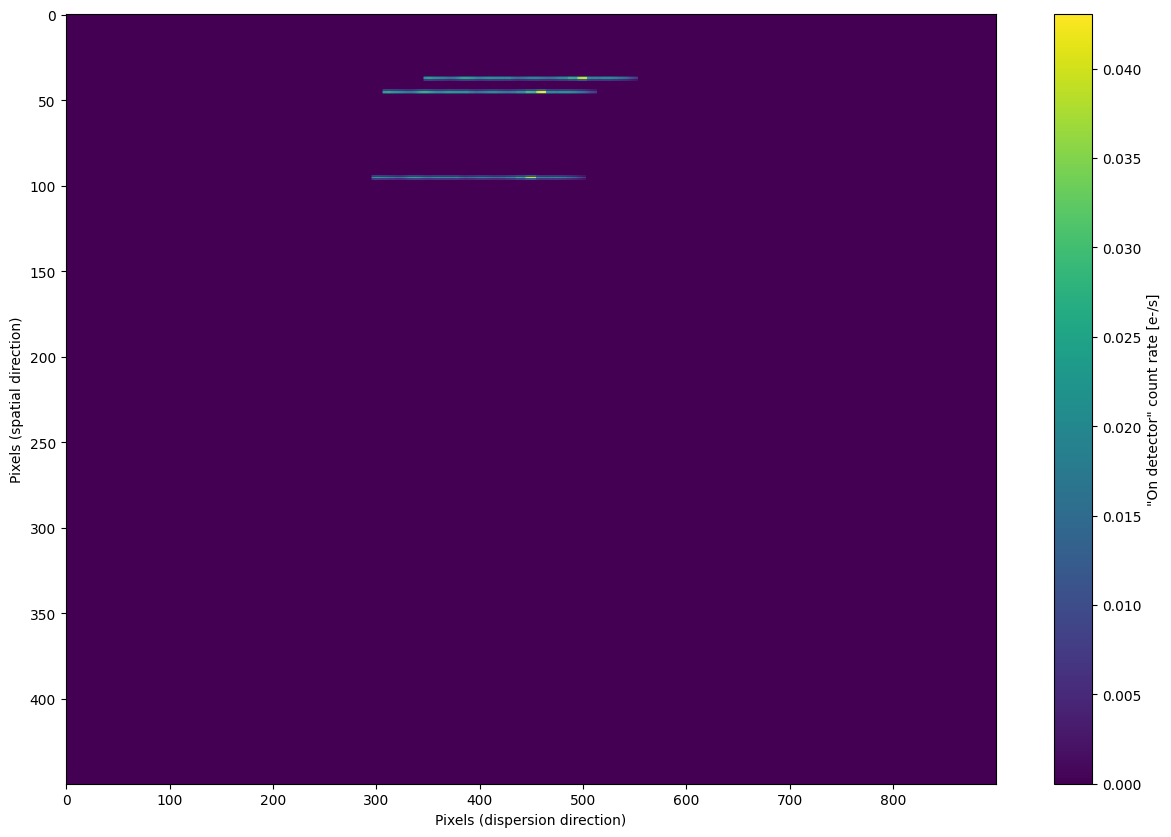

In [ ]:
#calling the disperse function :O
for i in range(len(mag_point)):
  disperse(disperser, source_image = source_image, source_disperse_region = source_seg, source_spectrum = s_spectrum, grism_channel = grism_channel, check = True)

```
another way! -->
```

In [ ]:
spectra = s_spectrum
scene_direct = np.nansum(sources_individ, axis=0)

scene_seg = source_seg
#grism_channel above
exposure_time =3600 #seconds, why ?

In [ ]:
disperser.observe_scene(disperser, scene_direct = scene_direct, scene_seg = scene_seg, spectra = spectra, grism_channel = grism_channel, exposure_time = exposure_time, image_fov = False, check = True)
grism_scene_uv = disperser.grism_scene

In [ ]:
scene_direct = np.reshape(scene_direct, (fov, fov))
scene_seg = np.reshape(scene_seg, (fov, fov))

disperser.observe_scene(disperser, scene_direct = scene_direct, scene_seg = scene_seg, spectra = spectra, grism_channel = grism_channel, exposure_time = exposure_time, image_fov = False, check = True)
grism_scene_uv = disperser.grism_scene


In [ ]:
plt.figure()
plt.imshow(grism_scene_uv, origin="lower", aspect="auto", vmin=0, vmax=2)
plt.colorbar(label='Counts (e-)')
plt.xlabel('x (dispersion direction)')
plt.ylabel('y (spatial direction)')
plt.title("UV grism scene")
